GeometricShapes(40)
Data(face=[3, 24], pos=[12, 3], y=[1])


/tmp/ipykernel_2728957/441680427.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


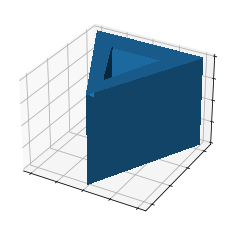

/tmp/ipykernel_2728957/441680427.py:16: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


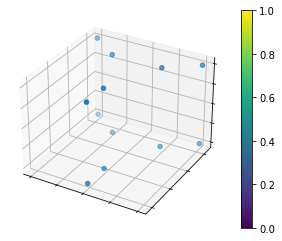

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch
def visualize_mesh(pos, face):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    ax.axes.zaxis.set_ticklabels([])
    ax.plot_trisurf(pos[:, 0], pos[:, 1], pos[:, 2], triangles=data.face.t(), antialiased=False)
    plt.show()

def visualize_points_3d(pos, colorset = None):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    ax.axes.zaxis.set_ticklabels([])
    im = ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2], c = colorset, cmap = 'cool')
    fig.colorbar(im, ax = ax)
    plt.show()


def visualize_points(pos, edge_index=None, index=None, colorset = None):
    fig = plt.figure(figsize=(4, 4))
    if edge_index is not None:
        for (src, dst) in edge_index.t().tolist():
             src = pos[src].tolist()
             dst = pos[dst].tolist()
             plt.plot([src[0], dst[0]], [src[1], dst[1]], linewidth=1, color='black')
    if index is None:
        plt.scatter(pos[:, 0], pos[:, 1], s=50, zorder=1000, c = colorset, cmap = 'jet')
    else:
       mask = torch.zeros(pos.size(0), dtype=torch.bool)
       mask[index] = True
       plt.scatter(pos[~mask, 0], pos[~mask, 1], s=50, color='lightgray', zorder=1000)
       plt.scatter(pos[mask, 0], pos[mask, 1], s=50, zorder=1000)
    plt.axis('off')
    
    plt.show()

from torch_geometric.datasets import GeometricShapes

dataset = GeometricShapes(root='_data/GeometricShapes')
print(dataset)

data = dataset[10]
print(data)
visualize_mesh(data.pos, data.face)


visualize_points_3d(data.pos)

Data(pos=[12, 3], y=[1])


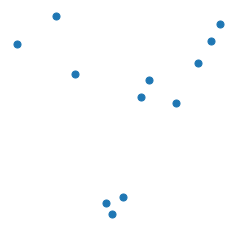

Data(pos=[12, 3], y=[1])


/tmp/ipykernel_2728957/441680427.py:16: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


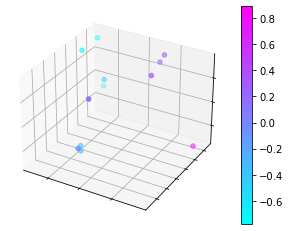

In [117]:
import torch
from torch_geometric.transforms import SamplePoints

torch.manual_seed(42)

dataset.transform = SamplePoints(num=12)

data = dataset[10]
print(data)
visualize_points(data.pos, data.edge_index)

data = dataset[10]
print(data)
#visualize_points(data.pos, colorset = [p[0] for p in data.pos])
visualize_points_3d(data.pos, colorset = [p[0] for p in data.pos])

torch.Size([2, 1440])


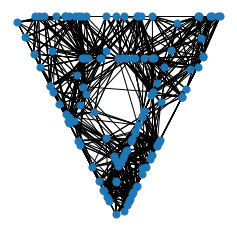

In [199]:
from torch_cluster import knn_graph
data = dataset[10]
data.edge_index = knn_graph(data.pos, k=12)
print(data.edge_index.shape)
visualize_points(data.pos, edge_index=data.edge_index)

In [313]:
# Get laplacian
from torch_geometric.utils import get_laplacian, to_dense_adj
dataset.transform = SamplePoints(num=30)

data = dataset[10]
data.edge_index = knn_graph(data.pos, k=5)
edg_idx, edg_attr = get_laplacian(data.edge_index, normalization = "sym")
x = to_dense_adj(edg_idx, batch = None, edge_attr = edg_attr).squeeze()
print(x.shape)

torch.Size([30, 30])


In [314]:
eigval, eigvec = torch.linalg.eig(x.squeeze())
eigval = eigval.real
eigvec = eigvec.real
eigval.min()
#eigval

tensor(4.7385e-08)

In [315]:
# check if eigenvectors are really eigenvectors
rdx = 0
eigvec1 = eigvec[:, rdx]
print(eigvec1.shape)
max(abs(x@eigvec1 - eigval[rdx] * eigvec1))
# nice.

torch.Size([30])


tensor(4.7684e-07)

tensor(0)
tensor(0.1814) tensor(0.6489)


/tmp/ipykernel_2728957/441680427.py:16: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


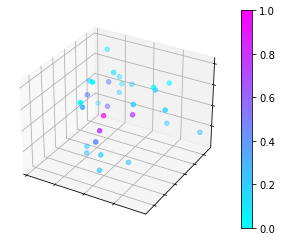

In [322]:
# we must use the largest? all smallest?
idx = 6

idx_sorted_eigval = torch.argsort(eigval)
#print(idx_sorted_eigval)
print(idx_sorted_eigval[idx])
eigvec_idx = eigvec[:, idx_sorted_eigval[idx]]
print(eigvec_idx.std(), eigval[idx_sorted_eigval[idx]])
eigvec_idx = (eigvec_idx - eigvec_idx.min()) / (eigvec_idx.max() - eigvec_idx.min())
visualize_points_3d(data.pos, colorset = [p for p in eigvec_idx.tolist()])

In [38]:
# Laplacian feature
eigval.argsort()


tensor([[11,  7,  6,  4, 10,  8,  5,  9,  3,  2,  1,  0]])